In [32]:
%matplotlib inline

In [33]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as pl

In [4]:
hdu = fits.open('../data/forwcs_drc_sci.fits')

In [8]:
hdu

In [5]:
imagedata = hdu[0].data.copy()

In [7]:
coords = np.genfromtxt('../data/hst_coords.dat').transpose()

In [14]:
coords[2], coords[3]

(array([  975.665,  1463.135,  2460.64 ,  4431.166,  3402.273,   994.797,
         1820.908,  3360.234,  4171.773]),
 array([ 3984.783,  3204.041,  3584.388,  3646.583,  2148.794,  1799.993,
         1207.87 ,  1266.37 ,  1536.732]))

In [94]:
import fitstars
reload(fitstars)

<module 'fitstars' from 'fitstars.py'>

In [88]:
%prun results = fitstars.fitstars(imagedata, coords[2][:2], coords[3][:2], 15, subnx=21, subny=21)

In [17]:
import psf
%time psf.moffat_kernel(0.1, 0.1, 2.5, 2.0, q = 0.9, posang=75)

CPU times: user 1.97 ms, sys: 1.39 ms, total: 3.36 ms
Wall time: 1.97 ms


array([[ 0.00027715,  0.00036271,  0.00046476,  0.00057496,  0.000676  ,
         0.00074412,  0.00075907,  0.00071592,  0.00062836,  0.00051998,
         0.00041217,  0.00031774,  0.00024123],
       [ 0.00038586,  0.0005342 ,  0.00072794,  0.00095845,  0.00119095,
         0.00136247,  0.0014085 ,  0.00130909,  0.00110575,  0.00086768,
         0.00064857,  0.00047205,  0.00034007],
       [ 0.00052903,  0.0007822 ,  0.00115113,  0.00164815,  0.00221889,
         0.00269478,  0.00284919,  0.00259198,  0.0020682 ,  0.00150489,
         0.00103994,  0.00070419,  0.00047673],
       [ 0.00070085,  0.00111307,  0.00179314,  0.00286015,  0.0043159 ,
         0.00575547,  0.00632726,  0.00557639,  0.00408463,  0.00267227,
         0.00166773,  0.00103566,  0.000654  ],
       [ 0.00087551,  0.00148862,  0.00263381,  0.00475735,  0.0083301 ,
         0.01275961,  0.01498306,  0.01263296,  0.00818785,  0.00465911,
         0.00257704,  0.00145736,  0.00085815],
       [ 0.00100513,  0.001797

In [20]:
reload(fitstars)
%time p0, d, sig = fitstars.fitstars(imagedata, coords[2][:2], coords[3][:2], 5, subnx=35, subny=35)

CPU times: user 345 ms, sys: 35.2 ms, total: 380 ms
Wall time: 381 ms


In [24]:
%timeit fitstars.star_chi2(p0, d, sig)
%prun fitstars.star_chi2(p0, d, sig)

10 loops, best of 3: 68.7 ms per loop
 

In [85]:
#print(results)
print("PSF parameters: " +str(results[0:4]))
print("X0s: " + str(results[4::4]))
print("Y0s: " + str(results[5::4]))
print("fluxes: " + str(results[6::4]))
print("sky: " + str(results[7::4]))

PSF parameters: [ 1.84214287  2.35334647  1.02254277 -0.29050102]
X0s: [-0.04561643  0.2115438 ]
Y0s: [-0.1928206   0.01101463]
fluxes: [  417249.27170314  1995413.67826859]
sky: [ 163.66096441  223.6031922 ]


In [8]:
imagedata

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [29]:
d

array([[[ 156.20832825,  156.25312805,  161.51623535, ...,  151.22013855,
          154.61579895,  164.46794128],
        [ 145.35603333,  172.2481842 ,  167.64770508, ...,  150.55780029,
          161.74372864,  184.21298218],
        [ 141.22732544,  141.36724854,  154.60215759, ...,  167.55947876,
          190.37295532,  154.57791138],
        ..., 
        [ 173.46313477,  151.7454834 ,  144.07608032, ...,  163.20500183,
          176.05499268,  169.81269836],
        [ 167.64846802,  171.39352417,  149.96858215, ...,  164.68559265,
          159.93951416,  160.12463379],
        [ 143.71281433,  165.61494446,  144.36323547, ...,  140.48175049,
          140.19613647,  165.08612061]],

       [[ 160.14268494,  178.67402649,  159.62524414, ...,  177.76255798,
          202.37878418,  189.92410278],
        [ 179.35691833,  194.1403656 ,  183.66270447, ...,  209.64271545,
          185.02838135,  172.77827454],
        [ 184.33010864,  200.41433716,  195.26556396, ...,  206.33717346

In [89]:
reload(fitstars)
dmodel = fitstars.model_stars(results, 21, 21)
d = fitstars.make_substamps(imagedata, coords[2], coords[3], 21, 21)

[[10 10]]
[[10 10]]


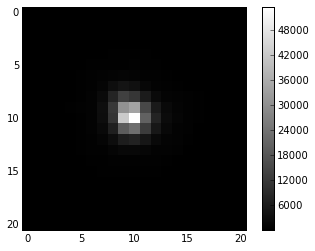

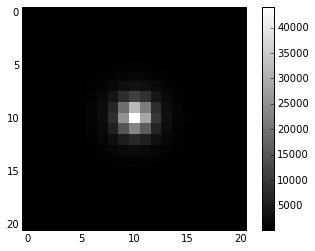

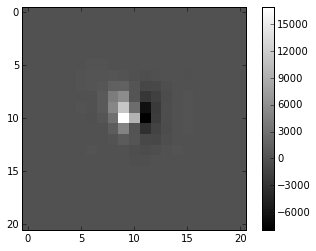

In [90]:
pl.imshow(d[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(dmodel[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(d[0] - dmodel[0], cmap = 'gray', interpolation='nearest'); pl.colorbar()
print(np.argwhere(dmodel[0] == dmodel[0].max()))
print(np.argwhere(d[0] == d[0].max()))

<matplotlib.colorbar.Colorbar instance at 0x120321950>

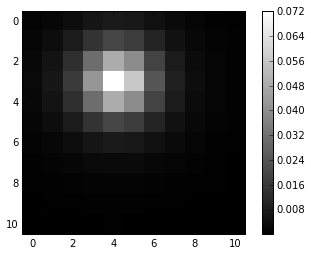

In [93]:
pl.imshow(psf.moffat_kernel(-0.8, -2.0, 2, 2), cmap = 'gray', interpolation='nearest'); pl.colorbar()

In [138]:
reload(fitstars)
%prun curve_results = fitstars.curvefitstars(imagedata, [coords[2][6]], [coords[3][6]], 15, subnx=21, subny=21)

In [139]:
reload(fitstars)
dmodel = fitstars.model_stars(curve_results[0], 21, 21)
d = fitstars.make_substamps(imagedata, coords[2], coords[3], 21, 21)

[[10 10]]
[[10 10]]


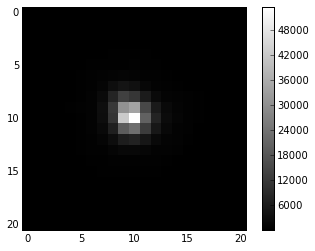

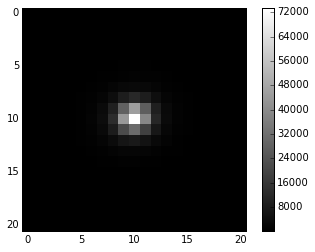

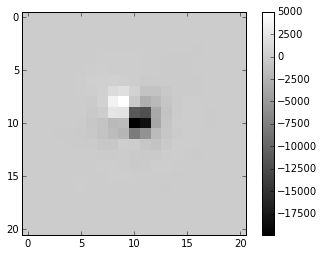

In [140]:
pl.imshow(d[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(dmodel[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(d[0] - dmodel[0], cmap = 'gray', interpolation='nearest'); pl.colorbar()
print(np.argwhere(dmodel[0] == dmodel[0].max()))
print(np.argwhere(d[0] == d[0].max()))

In [134]:
curve_results[0]

array([  2.17285214e+00,   2.56539052e+00,   9.54314266e-01,
         1.72127566e+01,  -2.94151047e-01,  -2.36150435e-01,
         4.57344049e+05,   1.62230863e+02,   1.82683082e-01,
         8.03035578e-02,   2.11576282e+06,   2.76797925e+02,
        -3.17156924e-01,   3.75125097e-01,   2.21068077e+05,
         9.23326150e+02,   1.78289106e-01,  -4.89082231e-01,
         2.83633201e+05,   1.58587016e+02,   3.28382673e-01,
        -2.38808363e-01,   9.88725205e+04,   1.45549337e+02,
        -1.87498199e-01,  -3.07041257e-03,   8.16632917e+04,
         1.45360908e+02,  -3.64771006e-02,  -1.65640024e-01,
         5.42739895e+05,   1.60795620e+02,   2.92108907e-01,
         3.80192771e-01,   2.89410057e+05,   1.52635429e+02,
        -1.89863898e-01,  -1.92632609e-01,   2.97198683e+06,
         4.52841909e+02])

In [137]:
coords[3]

array([ 3984.783,  3204.041,  3584.388,  3646.583,  2148.794,  1799.993,
        1207.87 ,  1266.37 ,  1536.732])

In [141]:
#print(results)
print("PSF parameters: " +str(curve_results[0][0:4]))
print("X0s: " + str(curve_results[0][4::4]))
print("Y0s: " + str(curve_results[0][5::4]))
print("fluxes: " + str(curve_results[0][6::4]))
print("sky: " + str(curve_results[0][7::4]))

PSF parameters: [  1.72217695   2.34605543   0.89468753 -79.76023174]
X0s: [-0.05332514]
Y0s: [-0.15679056]
fluxes: [ 594847.04834517]
sky: [ 186.93486034]
